### Import Modules

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Data Preperation

#### Custom method to handle NaN and inf value

In [7]:
# Custom transformer to replace inf/-inf with NaN
class ReplaceInf(BaseEstimator, TransformerMixin):
    def __init__(self, value=np.nan):
        self.value = value

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = pd.DataFrame(X).replace([np.inf, -np.inf], self.value)
        return X

In [71]:
# Load the train data set
df = pd.read_csv('train_data.csv')
df.shape
df.describe

<bound method NDFrame.describe of           id  McCabeLineCount  McCabeCyclomaticComplexity  \
0      84485                8                           2   
1      77265            85293                           4   
2      62215               14                           2   
3      11168               19                           3   
4      45035                8                           3   
...      ...              ...                         ...   
74790  54886               61                           8   
74791  76820               16                           4   
74792  65170               14                          98   
74793    860               17                           2   
74794  15795            91854                          98   

       McCabeEssentialComplexity  McCabeDesignComplexity  \
0                              1                     1.0   
1                              4                     1.0   
2                              1                     

In [23]:
# Select only numerical columns and calculate their median
numerical_median = df.select_dtypes(include=['number']).median()

# Replace missing values in numerical columns with their respective median
df.fillna(numerical_median, inplace=True)
df.describe


<bound method NDFrame.describe of           id  McCabeLineCount  McCabeCyclomaticComplexity  \
0      84485                8                           2   
1      77265            85293                           4   
2      62215               14                           2   
3      11168               19                           3   
4      45035                8                           3   
...      ...              ...                         ...   
74790  54886               61                           8   
74791  76820               16                           4   
74792  65170               14                          98   
74793    860               17                           2   
74794  15795            91854                          98   

       McCabeEssentialComplexity  McCabeDesignComplexity  \
0                              1                     1.0   
1                              4                     1.0   
2                              1                     

In [31]:
df_test = pd.read_csv('test_data.csv')

# Splitting the dataset into features and target variable
X = df.drop(['id', 'defects'], axis=1)
#X = df.fillna(df.select_dtypes(include=['number']).median(), inplace= True);

y = df['defects']
X.describe
y.describe


<bound method NDFrame.describe of 0        False
1        False
2        False
3        False
4        False
         ...  
74790    False
74791    False
74792    False
74793    False
74794    False
Name: defects, Length: 74795, dtype: bool>

In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size = 0.2, random_state=42) #test_size=32056, train_size=74794, random_state=42)


In [35]:
# Splitting the dataset into features and target variable
X_test = df_test.drop(['id'], axis=1)
# Then, add a new column "defects" with all values set to 0
X_test['defects'] = 0

y_test = X_test['defects']
X_test = X_test.drop(['defects'], axis=1) 

id_df = df_test['id']


### Random Forest Classifier

In [38]:
# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_transformer = Pipeline(steps=[
    ('replace_inf', ReplaceInf()),  # Add this line to replace inf/-inf with NaN
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_string', FunctionTransformer(lambda x: x.astype(str), validate=False)),  # Convert to string
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


### Logistic Regression Classifier

In [42]:

print(X_train_preprocessed)
print(X_test_preprocessed)

  (0, 0)	-0.13270712763676182
  (0, 1)	-0.16302997751179746
  (0, 2)	-0.04989913182706321
  (0, 3)	-0.05631773452411215
  (0, 4)	-0.028813207742473788
  (0, 5)	-0.056410764523629996
  (0, 6)	-0.062115767005112225
  (0, 7)	-0.11267368063951534
  (0, 8)	-0.06862811414309943
  (0, 9)	-0.033153220968995055
  (0, 10)	-0.06536575969693871
  (0, 11)	-0.07435488968927728
  (0, 12)	-0.059743075362102604
  (0, 13)	-0.081987414155492
  (0, 14)	-0.11207296361133455
  (0, 15)	-0.16176720256384855
  (0, 16)	-0.184650004090788
  (0, 17)	-0.09497345783596806
  (0, 18)	-0.20830853719247155
  (0, 19)	-0.12640163737378673
  (0, 20)	-0.19831066907541978
  (0, 21)	1.334319527835279e-16
  (0, 22)	-0.14950281975372398
  (0, 23)	-0.20792407734135393
  (0, 24)	-0.22193510729462154
  :	:
  (14958, 10)	-0.039977942710369835
  (14958, 11)	-0.056057656807824506
  (14958, 12)	-0.04475160252855169
  (14958, 13)	-0.081987414155492
  (14958, 14)	-0.05531902703724045
  (14958, 15)	-0.16176720256384855
  (14958, 16)	-0.

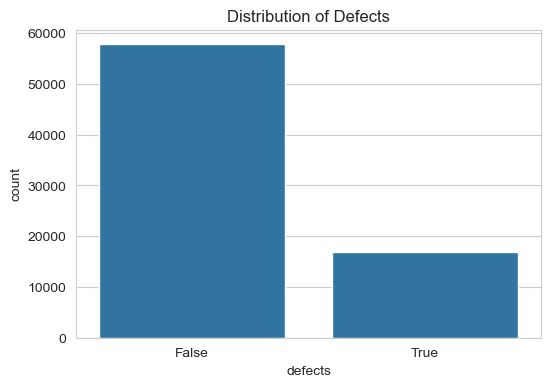

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


# # Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# # Distribution of defects
plt.figure(figsize=(6, 4))
sns.countplot(x='defects', data=df)
plt.title('Distribution of Defects')
plt.show()

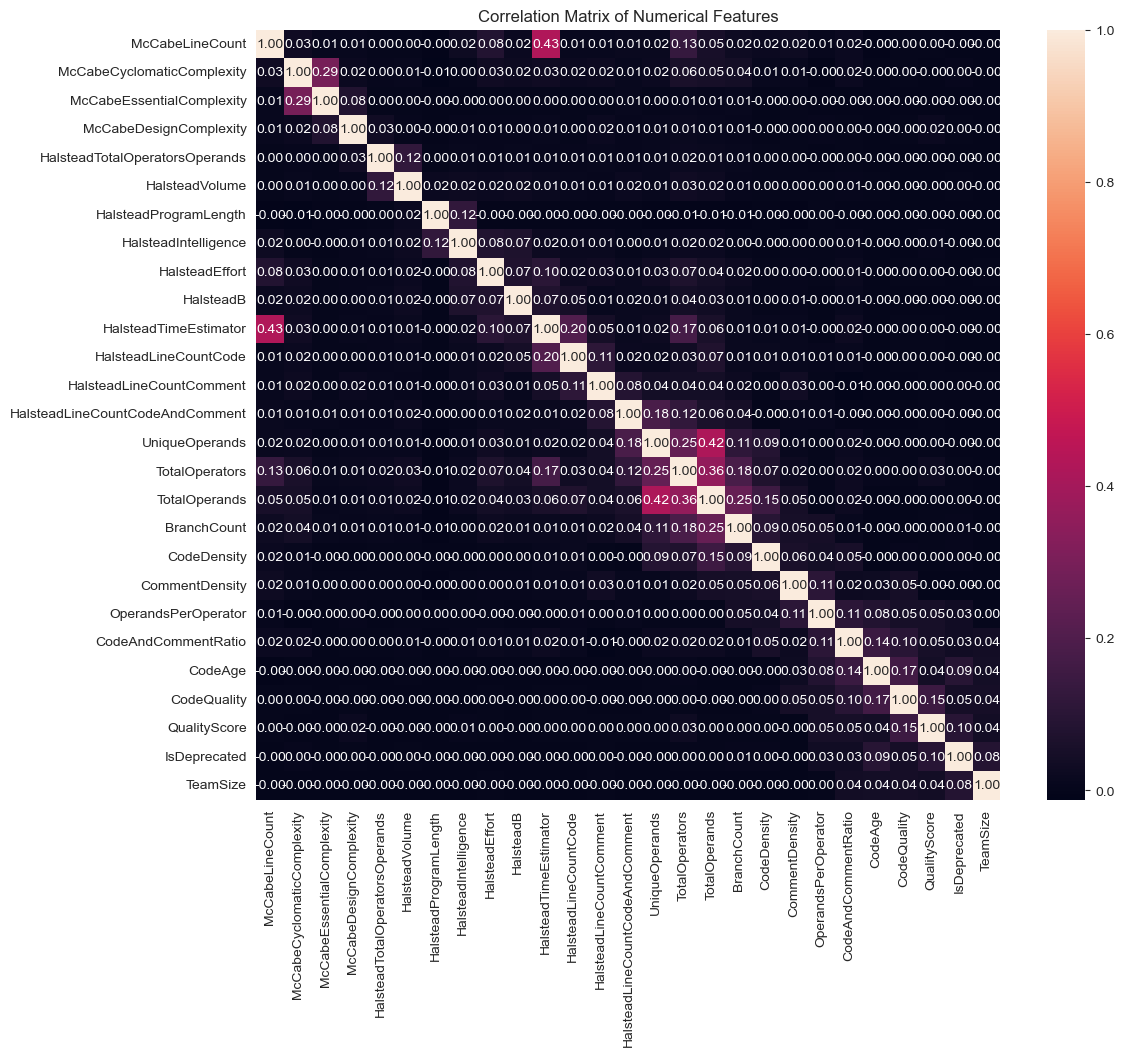

In [48]:
# # Correlation matrix heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

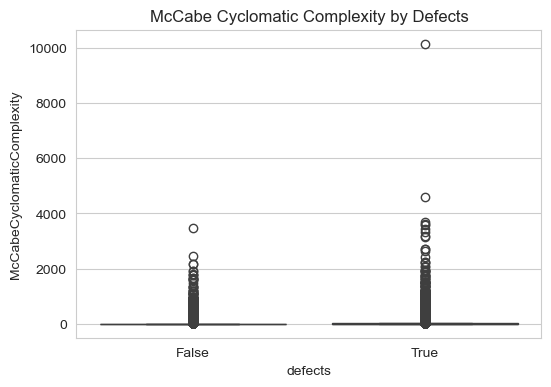

In [50]:
# # Boxplot for McCabe Cyclomatic Complexity
plt.figure(figsize=(6, 4))
sns.boxplot(x='defects', y='McCabeCyclomaticComplexity', data=df)
plt.title('McCabe Cyclomatic Complexity by Defects')
plt.show()

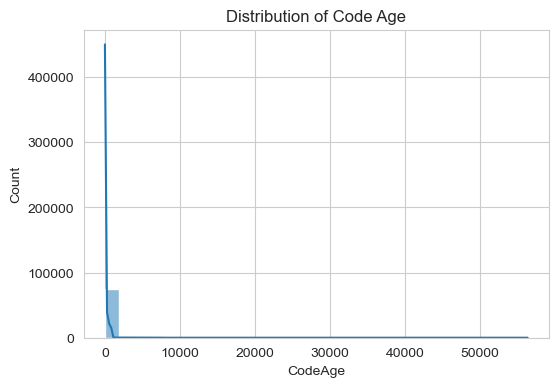

In [52]:

# # Distribution of Code Age
plt.figure(figsize=(6, 4))
sns.histplot(df['CodeAge'], bins=30, kde=True)
plt.title('Distribution of Code Age')
plt.show()


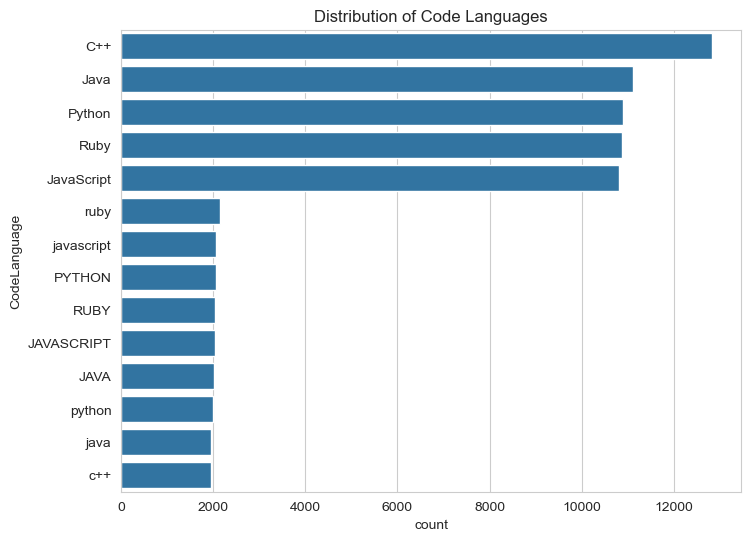

In [54]:

# # Exploring categorical data: CodeLanguage distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='CodeLanguage', data=df, order = df['CodeLanguage'].value_counts().index)
plt.title('Distribution of Code Languages')
plt.show()


In [56]:

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with the preprocessing and the classifier
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', rf_classifier)])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

result_df = pd.DataFrame({'id': id_df, 'defects': y_pred.astype(int)})
result_df
#result_df.to_csv('super_hack_prediction_v1.csv', index = False)






Accuracy: 0.8977102570501622

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     32056
           1       0.00      0.00      0.00         0

    accuracy                           0.90     32056
   macro avg       0.50      0.45      0.47     32056
weighted avg       1.00      0.90      0.95     32056



C:\Users\XZ957MG\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XZ957MG\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\XZ957MG\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,id,defects
0,56120,0
1,64981,0
2,42984,0
3,54865,0
4,79712,0
...,...,...
32051,1061,0
32052,30330,0
32053,100633,0
32054,74862,0


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32056 entries, 0 to 32055
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               32056 non-null  int64  
 1   McCabeLineCount                  32056 non-null  int64  
 2   McCabeCyclomaticComplexity       32056 non-null  int64  
 3   McCabeEssentialComplexity        32056 non-null  int64  
 4   McCabeDesignComplexity           25125 non-null  float64
 5   HalsteadTotalOperatorsOperands   32056 non-null  int64  
 6   HalsteadVolume                   26140 non-null  float64
 7   HalsteadProgramLength            32056 non-null  float64
 8   HalsteadDifficulty               28835 non-null  object 
 9   HalsteadIntelligence             29743 non-null  float64
 10  HalsteadEffort                   32056 non-null  float64
 11  HalsteadB                        32056 non-null  float64
 12  HalsteadTimeEstima